In [2]:
OPENSLIDE_PATH_LOCAL ="C:/Users/jcarvajal/AppData/Local/Programs/Python/Python310/lib/site-packages/openslide/openslide-win64-20220811/bin"
OPENSLIDE_PATH_REMOTE ="C:/Python/Python39/lib/site-packages/openslide/openslide-win64-20220811/bin"

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH_LOCAL):
        import openslide
else:
    import openslide
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
from openslide.deepzoom import DeepZoomGenerator

In [3]:
huge_image = open_slide("data\AustriaHugeImage.tif")
huge_image_props= huge_image.properties
print(huge_image_props)

<_PropertyMap {'openslide.level-count': '9', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '250000', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '250000', 'openslide.level[1].downsample': '2', 'openslide.level[1].height': '125000', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '125000', 'openslide.level[2].downsample': '4', 'openslide.level[2].height': '62500', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '62500', 'openslide.level[3].downsample': '8', 'openslide.level[3].height': '31250', 'openslide.level[3].tile-height': '256', 'openslide.level[3].tile-width': '256', 'openslide.level[3].width': '31250', 'openslide.level[4].downsample': '16', 'openslide.level[4].height': '15625', 'openslide.level[4].tile-height': '256', 'openslide.level[4].tile-width': '256', 'openslide.level[

In [4]:
tiles = DeepZoomGenerator(huge_image, tile_size=2500, overlap=0, limit_bounds=False)

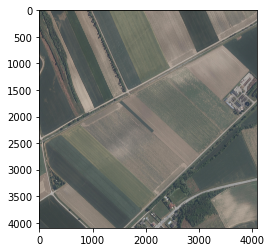

In [6]:
single_tile = tiles.get_tile(18,(0,0))
single_tile_rgb = single_tile.convert("RGB")
single_tile_rgb.show()
single_tile = np.array(single_tile_rgb)
plt.imshow(single_tile)

In [ ]:
#All the tiles were created
import os
tiles_dir = "tiles/"
for row in range(0,1):
    for col in range(0,1):
        tile_name = os.path.join(tiles_dir, '%d_%d' % (col, row))
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(18, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        #Save original tile
        tiff.imsave(tile_name + "_copy.tif", temp_tile_np)